## Carga de módulos

In [1]:
import warnings
import numpy as np
import pandas as pd
import missingno as msno
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from utilities.evaluation import ModelEvaluation
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

pd.set_option('float_format', '{:.2f}'.format)
warnings.filterwarnings(action='ignore')

## Carga de datos

In [2]:
churn = pd.read_csv('https://raw.githubusercontent.com/stivenlopezg/Diplomado-Python/master/data/Churn_Modelling.csv',
                    index_col=0)

for column in ['HasCrCard', 'IsActiveMember']:
    churn[column] = churn[column].map({1: 'Yes', 0: 'No'})

churn.sample(n=4)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
5902,15712930,Duncan,587,France,Male,42,1,0.00,1,No,No,123006.91,0
2967,15577178,Genovese,511,France,Male,45,5,68375.27,1,Yes,No,193160.25,1
4769,15698528,Napolitani,599,Spain,Female,31,3,0.00,1,Yes,Yes,130086.47,1
2006,15725835,West,785,Germany,Female,32,3,124493.03,2,No,Yes,52583.79,1


In [3]:
indices_cat = churn.sample(n=6, random_state=42).index
indices_num = churn.sample(n=4, random_state=123).index

churn.loc[indices_cat, 'Geography'] = np.nan
churn.loc[indices_num, 'EstimatedSalary'] = np.nan

<AxesSubplot:>

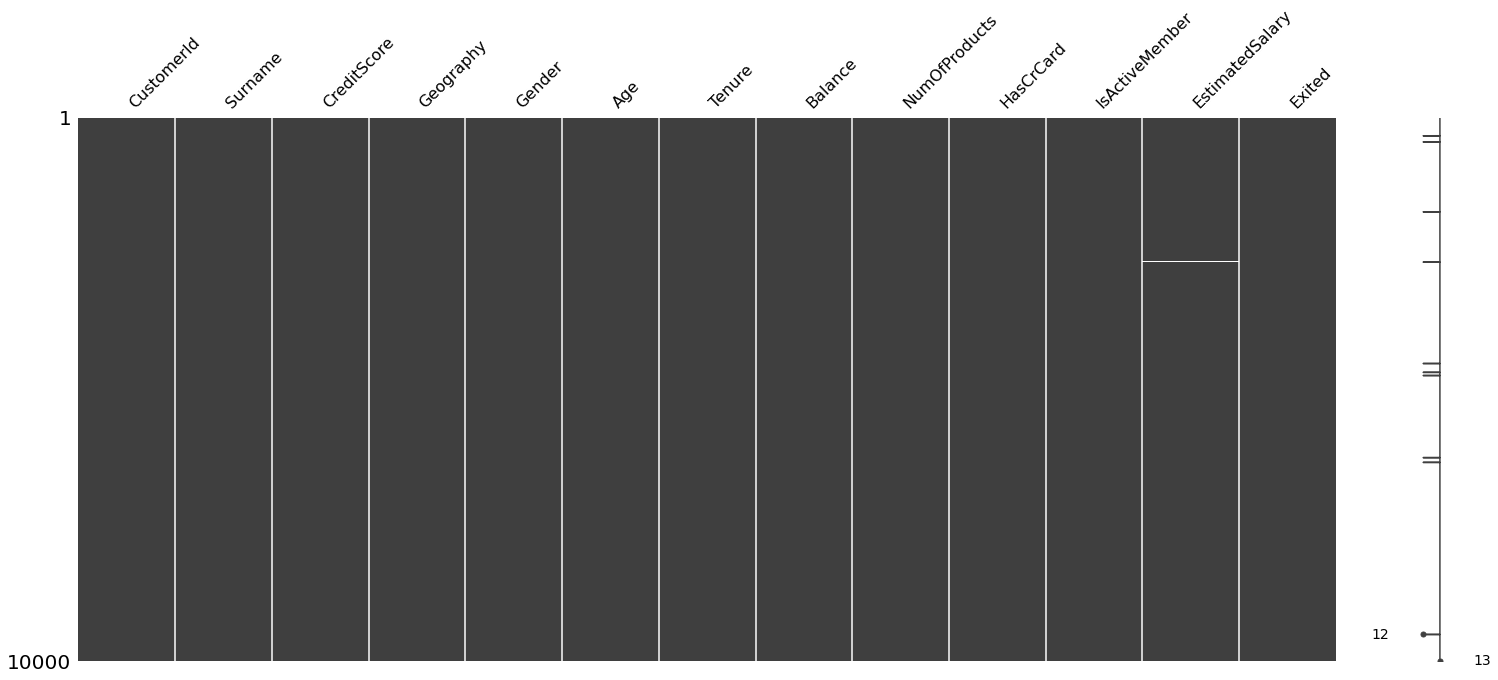

In [4]:
msno.matrix(churn)

<AxesSubplot:>

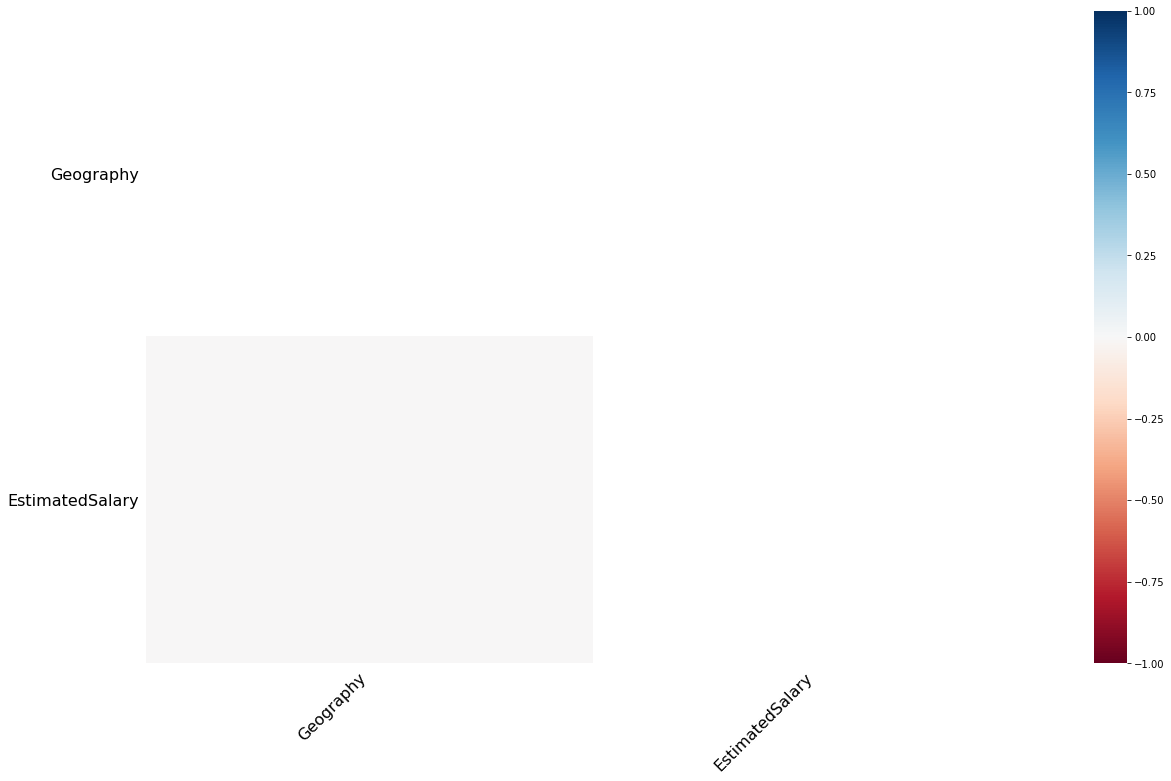

In [5]:
msno.heatmap(churn)

## Validación cruzada y elección del modelo

In [6]:
exited = churn.pop('Exited')

train_data, test_data, train_label, test_label = train_test_split(churn, exited,
                                                                  test_size=0.3,
                                                                  stratify=exited, random_state=42)

print(f'El set de entrenamiento tiene {train_data.shape[0]} observaciones, y {train_data.shape[1]} variables.')
print(f'El set de prueba tiene {test_data.shape[0]} observaciones, y {test_data.shape[1]} variables.')

El set de entrenamiento tiene 7000 observaciones, y 12 variables.
El set de prueba tiene 3000 observaciones, y 12 variables.
